In [1]:
'''
Created on October 31st 2017
@author: Juan Manuel Acevedo Valle
'''
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import h5py, os, sys, random
from scipy.stats import gaussian_kde
from scipy import stats
from scipy.stats.distributions import norm 

import itertools
import matplotlib
from scipy.stats import pearsonr, shapiro, anderson
from scipy.spatial import ConvexHull

colors_ = ['firebrick', 'darkgreen', 'deepskyblue', 'black', 'navy', 'grey', 'm', 'goldenrod']

from exploration.data.data import load_sim_h5_v2 as load_sim_h5
from exploration.data.PlotTools import *
from results_utils import *
from exploration.algorithm.utils.logging import read_config_log

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
for directory in ['diva_experiment_thesis_chap_5/', 'diva_experiment_thesis_chap_5_non_painful/']:
    data_files = os.listdir(directory)

    for data_file in (directory + d_f for d_f in data_files if 'sim_data.h5' in d_f):
        data_file = data_file
        conf_file = data_file.replace('sim_data.h5', 'conf.txt')
        conf = read_config_log(conf_file)
        data,foo = load_sim_h5(data_file)
        try:
            concat_sensor = np.append(concat_sensor, data.sensor.data.as_matrix(), axis=0)
        except:
            concat_sensor = data.sensor.data.as_matrix()

# print('Processing ' + group)
print("The shape of the data for PCA is:")
print(concat_sensor.shape)
pca = PCA(n_components = 4)      
pca.fit(concat_sensor[:,[0,1,3,4]])
print("Variance contribution per per principal axes: ")
print(str(pca.explained_variance_))    
print("% Variance contribution per per principal axes: ")
print( str(pca.explained_variance_ratio_))    
print("Principal directions [n_components_n_features]:")
print(pca.components_)

The shape of the data for PCA is:
(2436160, 6)
Variance contribution per per principal axes: 
[0.64314066 0.47598751 0.01136132 0.01066491]
% Variance contribution per per principal axes: 
[0.56358777 0.41711053 0.00995599 0.00934572]
Principal directions [n_components_n_features]:
[[ 0.51247891  0.61109407  0.39754124  0.45375143]
 [-0.37522677 -0.4725009   0.51736212  0.60686425]
 [-0.61403349  0.50993004 -0.44976753  0.40080344]
 [ 0.46854361 -0.3785212  -0.60992341  0.51495828]]


In [3]:
import h5py, random
from scipy.stats import gaussian_kde
from scipy.stats.distributions import norm    

def getPDFx_y(data):
    x_grid = np.linspace(-2.0, 2., 500)
    y_grid = np.linspace(-2.0, 2., 500)
    
    sensor_data = pca.transform(data)
    
    kde_x = gaussian_kde(sensor_data[:,0])
    pdf_x = kde_x.evaluate(x_grid)

    kde_y = gaussian_kde(sensor_data[:,1])
    pdf_y = kde_y.evaluate(y_grid)
               
    tmp_dict = {'n_samples': data.shape[0],'KDEx_': kde_x, 'KDEy_': kde_y, 'PDFx_': pdf_x, 'PDFy_': pdf_y, 'x_grid': x_grid, 'y_grid': y_grid}
    return tmp_dict

In [4]:
n_samples = 101000
mode_ops = ['autonomous','autonomous_pain']
type_ops = ['proprio','simple']

groups = itertools.product(mode_ops, type_ops)

dist_used = 'euclidean'
sensor_data = None

legends = []
pdf_data = []
for i,directory in enumerate(['diva_experiment_thesis_chap_5/', 'diva_experiment_thesis_chap_5_non_painful/']):
    data_files = [directory + file_ for file_ in os.listdir(directory)]
    for data_file in (d_f for d_f in data_files if 'sim_data.h5' in d_f):
        conf_file = data_file.replace('sim_data.h5', 'conf.txt')
        conf = read_config_log(conf_file)

        data,foo = load_sim_h5(data_file)
        
        sensor_data = data.sensor.data.as_matrix(columns=None)

        if conf['type']=='simple':
            try:
                data_to_append = sensor_data#[np.where(data.cons.data.as_matrix()==0.)[0],:]
                data_to_append = data_to_append[np.where\
                                   (np.logical_or(data_to_append[:,2]>0.1, data_to_append[:,5]>0.1))[0],:]
                concat_sensor_s = np.append(concat_sensor_s, data_to_append, axis=0)
                                 
            except:
                concat_sensor_s =  sensor_data#[np.where(data.cons.data.as_matrix()==0.)[0],:]
                concat_sensor_s =  concat_sensor_s[np.where\
                                   (np.logical_or(concat_sensor_s[:,2]>0.1, concat_sensor_s[:,5]>0.1))[0],:]
                
        elif conf['type']=='proprio':
            try:
                data_to_append = sensor_data#[np.where(data.cons.data.as_matrix()==0.)[0],:]
                data_to_append = data_to_append[np.where\
                                   (np.logical_or(data_to_append[:,2]>0.1, data_to_append[:,5]>0.1))[0],:]
                concat_sensor_p = np.append(concat_sensor_p, data_to_append, axis=0)
            except:
                concat_sensor_p =  sensor_data#[np.where(data.cons.data.as_matrix()==0.)[0],:]
                concat_sensor_p =  concat_sensor_p[np.where\
                                   (np.logical_or(concat_sensor_p[:,2]>0.1, concat_sensor_p[:,5]>0.1))[0],:]
                                             
    pdf_data += [getPDFx_y(concat_sensor_s[:,[0,1,3,4]])]
    pdf_data += [getPDFx_y(concat_sensor_p[:,[0,1,3,4]])]
    if 'pain' in directory:
        legends += ['Simple group (No pain during initialization)']
        legends += ['Somesthetic group (No pain during initialization)']
    else:
        legends += ['Simple group','Somesthetic group']
    del concat_sensor_s
    del concat_sensor_p

203984
395919
177437
421034
Simple group
0.999999999807, 1.0
0.484483438299, 0.484483438392
Somesthetic group
0.999999960756, 1.0
0.94034919855, 0.940349235454
Simple group (No pain during initialization)
0.999999999645, 1.0
0.421431523195, 0.421431523345
Somesthetic group (No pain during initialization)
0.999999181958, 1.0
0.999999181958, 1.0


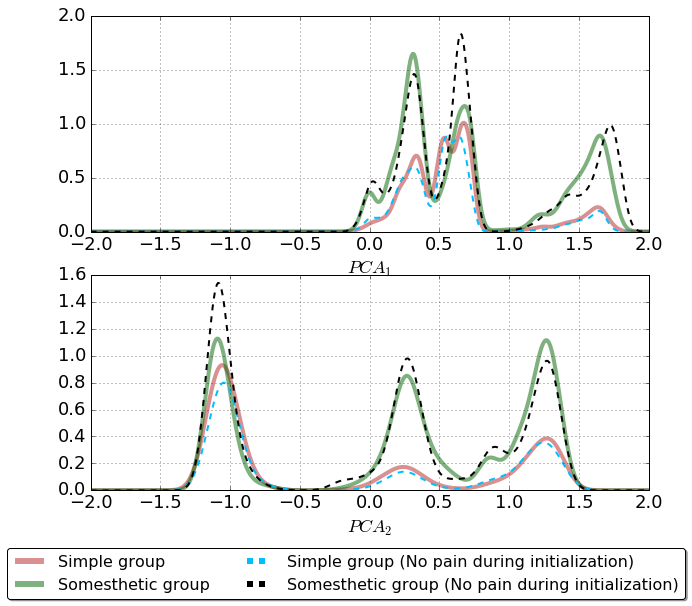

In [10]:
import scipy
def plotPDFx_y(axes, pdf_data, color, ls='-', lw=3.5, alpha=0.4, normalize=None):
    x_grid = pdf_data['x_grid']
    y_grid = pdf_data['y_grid']
    
    pdf_x = pdf_data['PDFx_']
    pdf_y = pdf_data['PDFy_']

    print('{}, {}'.format(scipy.integrate.cumtrapz(pdf_x, x_grid)[-1], scipy.integrate.cumtrapz(pdf_y,y_grid)[-1]))
    if normalize is None:
        gamma = 1.
    else:
        gamma = float(pdf_data['n_samples'])/normalize
    print('{}, {}'.format(gamma*scipy.integrate.cumtrapz(pdf_x, x_grid)[-1], gamma*scipy.integrate.cumtrapz(pdf_y,y_grid)[-1]))

    axes[0].plot(x_grid, gamma*pdf_x, color=color, alpha=alpha, lw=lw, ls=ls)
    axes[0].set_xlim(-2, 2)

    axes[1].plot(y_grid, gamma*pdf_y, color=color, alpha=alpha, lw=lw, ls=ls)
    axes[1].set_xlim(-2, 2)

matplotlib.rcParams['figure.figsize'] = (10.0, 8.5)
matplotlib.rcParams.update({'font.size': 18})

fig, axes = plt.subplots(2,1)
lgd_ = []
ls_ = ['-','-','--','--']
lw = [4,4,2,2]
a = [0.5,0.5,1,1]
max_samples = 0
for pdf in pdf_data:
    print(pdf['n_samples'])
    max_samples = max(max_samples,pdf['n_samples'])

for i, (pdf,lgd_k) in enumerate(zip(pdf_data,legends)):
#     plotPDFx_y(axes, pdf, colors_[i], ls=ls_[i], lw=lw[i], alpha=a[i], normalize=None)#=max_samples)
    print lgd_k
    plotPDFx_y(axes, pdf, colors_[i], ls=ls_[i], lw=lw[i], alpha=a[i], normalize=max_samples)

    lgd_ += lgd_k
    
plt.sca(axes[0])
plt.xlabel('$PCA_1$')
plt.sca(axes[1])
plt.xlabel('$PCA_2$')

lgd = plt.legend(legends,ncol=2,loc='lower right', fontsize=16, bbox_to_anchor=(1.08, -0.54),
          fancybox=True, shadow=True)
for legobj in lgd.legendHandles:
    legobj.set_linewidth(6.0)
for ax in axes:
    plt.sca(ax)
    plt.grid(True)

In [9]:
fig.savefig('/home/yumilceh/Dropbox/Aplicaciones/ShareLaTeX/PhD_Thesis/chapters/chapter5/images/PCA_aud.eps',\
               format='eps', dpi=1000,bbox_extra_artists=(lgd,), bbox_inches='tight')

In [7]:
np.where(data.cons.data.as_matrix()==0.)[0]

array([   128,    155,    372, ..., 101007, 101008, 101009])

Simple group
0.341291380753, 0.198823518913
0.165350021641, 0.0963267020761
Somesthetic group
0.343478544976, 0.375952842624
0.322989787163, 0.353526968128
Simple group (No pain during initialization)
0.319202383551, 0.181354240843
0.134521946755, 0.0764283939834
Somesthetic group (No pain during initialization)
0.322122595942, 0.371356843963
0.322122595942, 0.371356843963


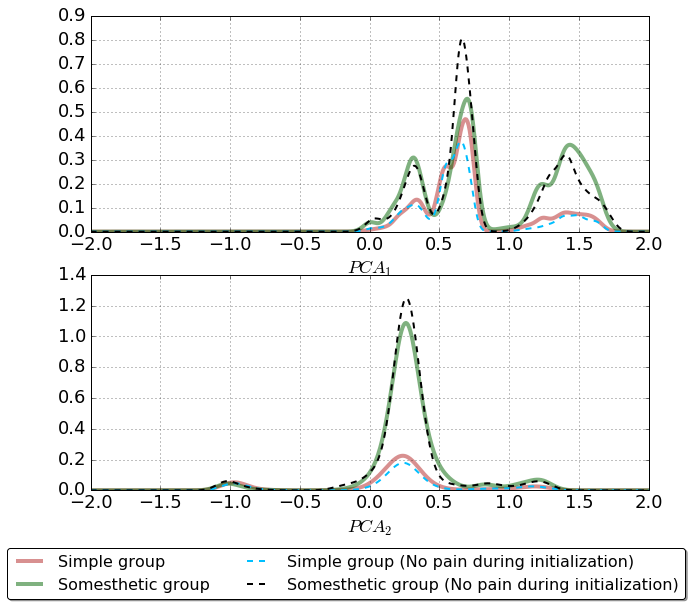

In [19]:
def plotPDFx_y_filtered(axes, pdf_data, pdf_filter, color, ls='-', lw=3.5, alpha=0.4, normalize=None):
    filter_pdf_x = pdf_filter['PDFx_']
    filter_pdf_y = pdf_filter['PDFy_']
    
    x_grid = pdf_data['x_grid']
    y_grid = pdf_data['y_grid']
    
    pdf_x = np.multiply(pdf_data['PDFx_'],filter_pdf_x)
    pdf_y = np.multiply(pdf_data['PDFy_'],filter_pdf_y)
    
    print('{}, {}'.format(scipy.integrate.cumtrapz(pdf_x, x_grid)[-1], scipy.integrate.cumtrapz(pdf_y,y_grid)[-1]))
    if normalize is None:
        gamma = 1.
    else:
        gamma = float(pdf_data['n_samples'])/normalize
    print('{}, {}'.format(gamma*scipy.integrate.cumtrapz(pdf_x, x_grid)[-1], gamma*scipy.integrate.cumtrapz(pdf_y,y_grid)[-1]))

    axes[0].plot(x_grid, gamma*pdf_x, color=color, alpha=alpha, lw=lw, ls=ls)
    axes[0].set_xlim(-2, 2)

    axes[1].plot(y_grid, gamma*pdf_y, color=color, alpha=alpha, lw=lw, ls=ls)
    axes[1].set_xlim(-2, 2)
    
eval_data, foo = load_sim_h5('../../systems/datasets/german_dataset_somato.h5')
eval_sensor_data = eval_data.sensor.data.as_matrix(columns=None)[:,[0,1,3,4]]    
evalPDF = getPDFx_y(eval_sensor_data)


fig2, axes2 = plt.subplots(2,1)
for i, (pdf,lgd_k) in enumerate(zip(pdf_data,legends)):
#     plotPDFx_y(axes, pdf, colors_[i], ls=ls_[i], lw=lw[i], alpha=a[i], normalize=None)#=max_samples)
    print lgd_k
    plotPDFx_y_filtered(axes2, pdf, evalPDF, colors_[i], ls=ls_[i], lw=lw[i], alpha=a[i], normalize=max_samples)

    lgd_ += lgd_k

plt.sca(axes2[0])
# plt.title('Evaluation dataset distribution')
plt.xlabel('$PCA_1$')
plt.grid(True)
plt.sca(axes2[1])
plt.xlabel('$PCA_2$')
plt.grid(True)

lgd2 = plt.legend(legends,ncol=2,loc='lower right', fontsize=16, bbox_to_anchor=(1.08, -0.54),
          fancybox=True, shadow=True)
for legobj in lgd.legendHandles:
    legobj.set_linewidth(6.0)
for ax in axes2:
    plt.sca(ax)
    plt.grid(True)

In [21]:
fig2.savefig('/home/yumilceh/Dropbox/Aplicaciones/ShareLaTeX/PhD_Thesis/chapters/chapter5/images/PCA_aud_filtered.eps',\
               format='eps', dpi=1000,bbox_extra_artists=(lgd2,), bbox_inches='tight')